<h1 align="center">The Evolution of Major League Baseball: Told Through Its Players</h1>

<h4 align="center" style="margin-top:-10px;">
    A data-driven exploration of player origins, team spending, and career patterns<br>
    Powered by SQL queries and Python analytics
</h4>

<h5 align="center"> 
    <strong>Analyzed by — Shreeyasha Padey</strong>
</h5>

<hr>


## ☰ Project Overview

This project uncovers trends and patterns in Major League Baseball (MLB) player data using **SQL** for data extraction and **Python** for analysis and visualization.

We dive into where players come from, which schools consistently produce MLB talent, how teams differ in spending and player retention, and what player attributes—like height, weight, and batting/throwing handedness—reveal about positional roles. We also take a closer look at player longevity to understand career span trends across the league.

Whether you're a recruiter, coach, or data enthusiast, the aim is to surface insights that bridge performance, business decisions, and player development within professional baseball.

- **Tools Used:** PostgreSQL, Python (pandas, matplotlib, seaborn), Jupyter Notebook  
- **Key Themes:** Player origins by state/school, team salary and retention trends, player longevity, player attribute comparision

---

## ☰ Data Source & Structure

The data for this project is stored in a **PostgreSQL relational database**, organized into the following key tables:

- **`players`** – Biographical information and attributes for each MLB player  
- **`salaries`** – Annual salary records by player and team  
- **`schools`** – School attendance records, including years attended  
- **`schools_details`** – School metadata (name, city, state, country)

Throughout the notebook, we use **SQL queries** (stored in the project’s [Queries/](https://github.com/shree131/SQL-Project-Players-Analysis/tree/main/Queries) folder) to extract and filter relevant slices of data for analysis and visualization.

---

## 1. Libraries and Database Setup

Before diving into the analysis, we import all necessary libraries and configure the connection to our PostgreSQL database. This includes libraries for data manipulation, visualization, custom styling, and secure credential handling.

### 🔹 Import Libraries

In [5]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Styling & Fonts
from pyfonts import load_font
from highlight_text import fig_text
import matplotlib.gridspec as gridspec
from IPython.display import display, Markdown

# Environment & Database
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

### 🔹 Global Styles and Themes
Set up consistent styling, color palettes, and custom fonts for a clean, branded look across all visualizations. 

In [7]:
# Set global seaborn style
sns.set_style("white", {
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.spines.left": True,
    "axes.spines.bottom": True
})

# Custom color palettes
palette_sequential = sns.color_palette("YlOrBr_r")
palette_core = {
    "primary_dark": "#8f3e2e", "primary_light": "#e3a049", "secondary_gray": "#696969",
    "highlight_red": "#c30101", "highlight_green": "#3b6e4d", "avline": "#a52a2a"
}

palette_qualitative = [
    "#c30101", "#561600", "#de6600", "#769c50", "#40532d",
    "#1e2b11", "#a52a2a", "#e07b3b", "#ffbc78", "#c4d6b0",
    "#627d41", "#364c2a", "#8f3e2e", "#e3a049", "#3b6e4d", "#b4cba6"
]

# Load Google Fonts
common_path = "https://github.com/google/fonts/blob/main/ofl/librebaskerville/"
font_regular = load_font(f"{common_path}LibreBaskerville-Regular.ttf?raw=true")
font_bold = load_font(f"{common_path}LibreBaskerville-Bold.ttf?raw=true")

### 🔹 Database Connection
We load credentials from a `.env` file to securely connect to the PostgreSQL database using SQLAlchemy.

In [9]:
# Load environment variables
load_dotenv()

# Retrieve credentials
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_HOST = os.getenv("DB_HOST", "localhost")
DB_PORT = os.getenv("DB_PORT", "5432")

# Create database engine
engine = create_engine(f'postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}')

---
## 2. Loading Data from PostgreSQL

We’ll load the core datasets used in this project directly from the PostgreSQL database using SQL queries. These include player biographies, salaries, schools attended, and school details.

To streamline the workflow, we define a few utility functions:

In [11]:
def preview_table(df, table_name, n=2):
    """Preview the first and last few rows of a DataFrame with an ellipsis in between."""
    ellipsis_row = pd.DataFrame({col: '...' for col in df.columns}, index=['...'])
    display(Markdown(f"**Preview of `{table_name}`**"))
    display(pd.concat([df.head(n), ellipsis_row, df.tail(n)]))

def load_table(table_name, columns="*"):
    """Load a full table (by default) from the PostgreSQL database as a DataFrame."""
    query = f"SELECT {columns} FROM {table_name};"
    return pd.read_sql(query, con=engine)

def load_sql_query(filename):
    """Run a saved SQL query file and return the results as a DataFrame."""
    with open(f"../Queries/{filename}.sql") as f:
        query = f.read()
    return pd.read_sql(query, con=engine)

### 🔹 Load Core Tables
We now load the following tables into pandas DataFrames:
- `players`: Player bios and handedness
- `salaries`: Yearly salary records
- `schools`: School attendance records
- `school_details`: Metadata on school location

In [13]:
player_subset = "playerid, birthyear, birthmonth, birthday, namegiven, debut, finalgame, weight, height, bats, throws"
players = load_table("players", player_subset)
salaries = load_table("salaries")
schools = load_table("schools")
school_details = load_table("school_details")

### 🔹 Quick Preview
To get a feel for the data structure, we preview each table:

In [15]:
preview_table(players, "players")
preview_table(salaries, "salaries")
preview_table(schools, "schools")
preview_table(school_details, "school_details")

**Preview of `players`**

,playerid,birthyear,birthmonth,birthday,namegiven,debut,finalgame,weight,height,bats,throws
0,aardsda01,1981.0,12.0,27.0,David Allan,2004-04-06,2013-09-28,205.0,75.0,R,R
1,aaronha01,1934.0,2.0,5.0,Henry Louis,1954-04-13,1976-10-03,180.0,72.0,R,R
...,...,...,...,...,...,...,...,...,...,...,...
18587,zuverge01,1924.0,8.0,20.0,George,1951-04-21,1959-06-15,195.0,76.0,R,R
18588,zwilldu01,1888.0,11.0,2.0,Edward Harrison,1910-08-14,1916-07-12,160.0,66.0,L,L


**Preview of `salaries`**

,yearid,teamid,lgid,playerid,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
...,...,...,...,...,...
24756,2014,WAS,NL,zimmejo02,7500000
24757,2014,WAS,NL,zimmery01,14000000


**Preview of `schools`**

,playerid,schoolid,yearid
0,aardsda01,pennst,2001
1,aardsda01,rice,2002
...,...,...,...
17348,zuvelpa01,stanford,1979
17349,zuvelpa01,stanford,1980


**Preview of `school_details`**

,schoolid,name_full,city,state,country
0,abilchrist,Abilene Christian University,Abilene,TX,USA
1,adelphi,Adelphi University,Garden City,NY,USA
...,...,...,...,...,...
1205,yale,Yale University,New Haven,CT,USA
1206,youngst,Youngstown State University,Youngstown,OH,USA


---
## 3. School-Based Analysis

*Where do professional baseball players come from and how has that changed over time?*

This section investigates the educational origins of MLB players using the `schools` and `school_details` tables. By analyzing the institutions and locations that have consistently produced top talent, we can uncover geographic and historical patterns in player development.

### 🔹 What We'll Explore:

- **3.1 Top Player-Producing Schools**  
   Which schools have sent the most players to the MLB?

- **3.2 State-Level Distribution**  
   How are these schools distributed geographically across U.S. states?

- **3.3 Growth Over Time**  
   How has the number of contributing schools evolved by decade?

- **3.4 Decade-Leading Schools**  
   Which schools led the pack in producing MLB players in each decade?

Whether you’re a recruiter looking to trace talent pipelines or a fan curious about the roots of baseball’s elite, these insights will reveal long-term trends, shifting hotbeds of talent, and institutional impact on player development across generations.

---
### 3.1 Top Player-Producing Schools

*Which schools have consistently funneled the most talent into the Major Leagues?*

To kick off our school-based analysis, we identify the **top 5 schools** that have produced the highest number of MLB players across the dataset. These schools stand out as historic pipelines of elite talent—whether due to strong baseball programs, favorable recruiting regions, or deep alumni networks.

**🔹 Method Summary:**

We queried the `schools` and `school_details` tables to count the number of unique MLB players associated with each school and then ranked them accordingly.

```sql
-- SQL Query:
SELECT sd.name_full AS school_name, COUNT(DISTINCT s.playerid) AS players_produced
FROM schools AS s
JOIN school_details AS sd ON s.schoolid = sd.schoolid
GROUP BY sd.name_full
ORDER BY players_produced DESC
LIMIT 5;

**🔹 Query Result:**

In [19]:
# Load and excute query
df_top_five_schools = load_sql_query("3.1_top_player_producers")
display(df_top_five_schools)

,school_name,players_produced
0,University of Texas at Austin,107
1,University of Southern California,105
2,Arizona State University,101
3,Stanford University,86
4,University of Michigan,76


### 📊 Insights: MLB Player Production by School

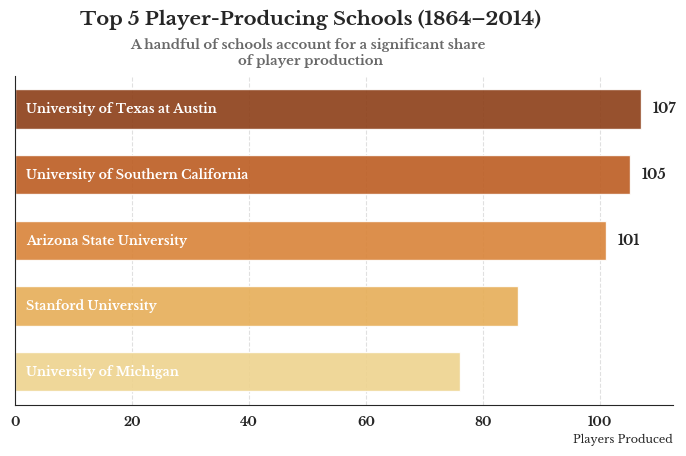

In [21]:
# Plot setup
fig, ax = plt.subplots(figsize=(7, 4))
ax.grid(axis="x", linestyle="--", alpha=0.6)

sns.barplot(
    data=df_top_five_schools,
    x="players_produced",
    y="school_name",
    hue="school_name", palette=palette_sequential[:5],
    ax=ax,
    width=0.6,
    alpha=0.9
)

# Titles
fig.text(0.45, 1.09, f"Top 5 Player-Producing Schools ({schools['yearid'].min()}–{schools['yearid'].max()})", 
         ha="center", font=font_bold, fontsize=14)
fig.text(0.45, 0.99, "A handful of schools account for a significant share \nof player production", 
         ha="center", fontsize=9.5, color="dimgrey", font=font_bold)

# Axes
plt.xlabel("Players Produced", font=font_regular, fontsize=8, loc="right")
plt.ylabel("")
plt.xticks(font=font_bold, size=9)
plt.yticks([])

# Annotate bars with values and school names
for index, row in df_top_five_schools.iterrows():
    if index < 3:
        ax.text(row["players_produced"] + 2, index, str(row["players_produced"]),
                va="center", font=font_bold, fontsize=10)
    ax.text(2, index, row["school_name"], va="center", ha="left",
            font=font_bold, fontsize=9, color="white")

plt.tight_layout()
plt.show()

**UT Austin and USC** lead the list, each producing over 100 MLB players, with **Arizona State University (ASU)** close behind. These institutions have established themselves as high-yield talent pipelines, likely due to their competitive collegiate programs, geographic advantage, and historic recruiting strength.

> *Fun fact:* The top 5 schools collectively produced **nearly 500 MLB players**, showcasing the outsized role a handful of institutions have played in shaping the league’s talent landscape.

---
### 3.2 State-Level Distribution
*Where do MLB players come from?* In this subsection, we zoom out to examine **which U.S. states** have historically produced the most professional baseball players — based on the states where they attended school.

**🔹 Top States by Player Count:**

To uncover this, we aggregate distinct players by state using the `schools` and `school_details` tables.
```sql
-- Top 3 U.S. states where most players attended school
SELECT sd.state, COUNT(DISTINCT playerid) AS num_players
FROM schools AS s
LEFT JOIN school_details AS sd
ON s.schoolid = sd.schoolid
GROUP BY sd.state
ORDER BY num_players DESC
LIMIT 3;

**🔹 Query Result:**

In [25]:
# Load and preview results
df_top_states = load_sql_query("3.2_top_five_states")
display(df_top_states)

,state,num_players
0,CA,1247
1,TX,536
2,FL,473
3,NC,284
4,PA,284


###  📊 Insights: State Powerhouses in MLB Talent

In [27]:
def custom_barplot(df, x_axis, y_axis, hue, y_label, x_label="", annote=True):
    """Create a bar plot with custom styling and bar labels."""
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    # Barplot
    for index, row in df.iterrows():
        alpha = 0.9 if index == 0 else 0.6
        bar_color = palette_sequential[index % len(palette_sequential)]
        ax.bar(row[x_axis], row[y_axis], color=bar_color, edgecolor="black", 
               width=0.5, alpha=alpha)

        # Annotate bar
        if annote:
            ax.text(row[x_axis], row[y_axis] + 5, f"{row[y_axis]:,}", 
                    ha="center", va="bottom", font=font_bold, fontsize=10)

    # Labels and ticks
    ax.set_ylabel(y_label, font=font_bold, fontsize=8, loc="bottom", color="dimgrey")
    ax.set_xlabel(x_label, font=font_bold, fontsize=8, loc="left", color="dimgrey")
    plt.yticks(font=font_bold, size=9)
    plt.xticks(font=font_bold, size=9)

    plt.tight_layout()

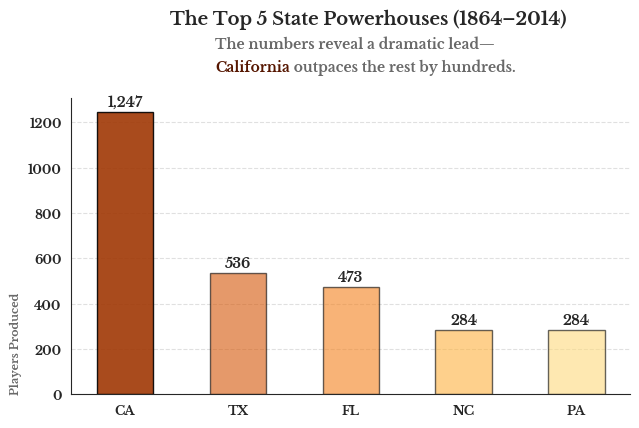

In [28]:
# Setup and plotting
fig, ax = plt.subplots(figsize=(6.5, 4))

# Title and subtitle
title = f"The Top 5 State Powerhouses ({schools["yearid"].min()}–{schools["yearid"].max()})"
subtitle = "The numbers reveal a dramatic lead—\n<California> outpaces the rest by hundreds."

fig.text(0.27, 1.02, title, font=font_bold, fontsize=13)
fig_text(0.57, 0.99, subtitle, fontsize=10, fontproperties=font_bold, ha="center", color="dimgrey", 
         highlight_textprops=[{"color": palette_qualitative[1]}])

custom_barplot(
    df=df_top_states,
    x_axis="state",
    y_axis="num_players",
    hue="state",
    y_label="Players Produced"
)

**California stands in a league of its own** — producing **1,247** MLB players, more than **double** that of Texas (536) and Florida (473). This overwhelming lead highlights California’s deep talent pipelines and strong school systems for baseball development.

---
### 3.3 Shift in School Representation Over the Decades
*More schools joined the pipeline — but has talent concentration reversed that trend?*

**🔹 Method Summary:**

By tracking school representation over time, we explore whether talent development has become more concentrated among a few institutions or broadened across many.
```sql
-- Number of schools that produced MLB players per decade
SELECT FLOOR(yearid / 10) * 10 AS decade,
       COUNT(DISTINCT schoolid) AS num_schools
FROM schools
GROUP BY decade
ORDER BY decade;

**🔹 Query Result:**

In [32]:
# Load and preview results
df_schools_per_decade = load_sql_query("3.3_schools_per_decade")
df_schools_per_decade.set_index("decade", inplace=True)
preview_table(df_schools_per_decade, "df_schools_per_decade")

**Preview of `df_schools_per_decade`**

,num_schools
1860,2
1870,14
...,...
2000,372
2010,57


### 📊 Insights: School Representation Over Time

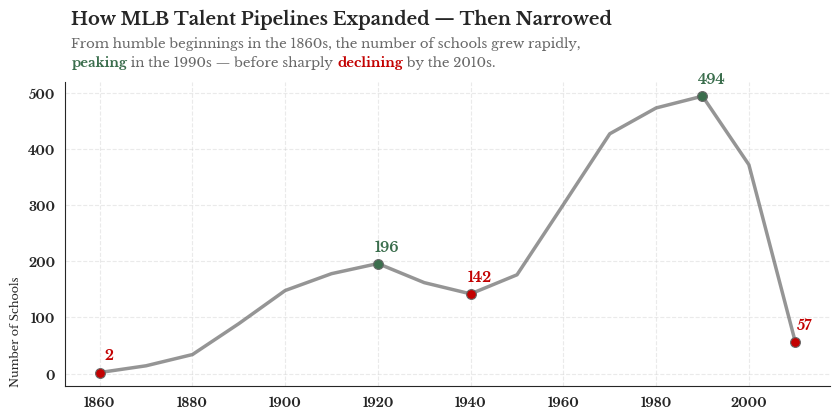

In [34]:
# Plot Setup
fig, ax = plt.subplots(figsize=(8.5, 4))
ax.grid(True, linestyle="--", alpha=0.4)

# Line plot of schools per decade
sns.lineplot(data=df_schools_per_decade, x="decade", y="num_schools", 
             linewidth=2.5, color=palette_core["secondary_gray"], alpha=0.7, ax=ax)

# Title and Subtitle
fig.text(0.09, 1.0, "How MLB Talent Pipelines Expanded — Then Narrowed", fontsize=13, font=font_bold)

subtitle = ("From humble beginnings in the 1860s, the number of schools grew rapidly, \n"
            "<peaking> in the 1990s — before sharply <declining> by the 2010s.")

fig_text(x=0.09, y=0.93, s=subtitle, ha="left", va="center", 
         fontsize=9.5, fontproperties=font_regular, color="dimgray",
         highlight_textprops=[{"color": palette_core["highlight_green"], "fontproperties": font_bold},
                              {"color": palette_core["highlight_red"], "fontproperties": font_bold}])

# Axis Labels and Ticks
plt.ylabel("Number of Schools", font=font_regular, fontsize=8, loc="bottom")
plt.xlabel("")
plt.yticks(font=font_bold, size=9)
plt.xticks(font=font_bold, size=9)

# Highlight Key Decades
highlight_df = df_schools_per_decade[df_schools_per_decade.index.isin([1860, 1920, 1940, 1990, 2010])]

for decade, row in highlight_df.iterrows():
    value = row["num_schools"]
    marker_color = (palette_core["highlight_green"] if decade in [1920, 1990] else palette_core["highlight_red"])
    
    # Annotate values
    ax.text(x=decade + 2, y=value + 15, s=f"{value}",
            ha="center", va="bottom", font=font_bold,
            fontsize=10, color=marker_color)

    # Highlight the point
    ax.scatter(x=decade, y=value, 
               color=marker_color, zorder=5, s=50, 
               edgecolor=palette_core["secondary_gray"], linewidth=0.8)

plt.tight_layout()
plt.show()

The pipeline of MLB talent started modestly in the 1860s. Over the following century, more and more schools joined the ranks, particularly post-1950s, signaling the sport’s growing national footprint.

**By the 1990s**, nearly **500 schools** were feeding players into Major League Baseball.

But that breadth didn’t last. A **notable decline by the 2010s** suggests that fewer institutions may now dominate recruitment — a sign that while the sport expanded, elite training may have grown more centralized.

---
### 3.4 Decade-Leading Schools
As Major League Baseball matured, its feeder institutions shifted. 

*Which schools ruled the pipeline in each decade and how has that dominance changed over time?*

**🔹 Method Summary:**

We assigned each player's appearance to a decade, counted the number of unique players per school in each decade, and then identified the top-producing school per decade.
```sql
WITH school_by_decade AS (
    SELECT *, FLOOR(yearid / 10) * 10 AS decade
    FROM schools
),

-- Count players per school per decade and rank schools by player count
school_ranking AS (
    SELECT 
        decade, 
        schoolid, 
        COUNT(DISTINCT playerid) AS num_players,
        ROW_NUMBER() OVER (PARTITION BY decade ORDER BY COUNT(DISTINCT playerid) DESC) AS school_rank
    FROM school_by_decade
    GROUP BY decade, schoolid
)

-- Get the top-ranked school for each decade
SELECT 
    CONCAT(sr.decade, 's') AS decade, 
    sd.name_full AS school_name, 
    sr.num_players
FROM school_ranking AS sr
LEFT JOIN school_details AS sd ON sr.schoolid = sd.schoolid
WHERE school_rank = 1
ORDER BY sr.decade DESC;

**🔹 Query Result:**

In [38]:
# Load and preview query result
df_top_schools_per_decade = load_sql_query("3.4_top_school_by_decade")
preview_table(df_top_schools_per_decade, "df_top_school_by_decade")

# Add a column counting how often each school appears as a top school
df_top_schools_per_decade = (
    df_top_schools_per_decade
    .assign(school_decade_count=lambda df: df["school_name"].map(df["school_name"].value_counts()))
    .sort_values(by=["school_decade_count", "num_players"], ascending=[False, False])
)

**Preview of `df_top_school_by_decade`**

,decade,school_name,num_players
0,1860s,fordham,1
1,1860s,villanova,1
...,...,...,...
19,2000s,longbeach,23
20,2010s,florida,5


### 📊 Decadal Dominance Insights: Who Ruled When?

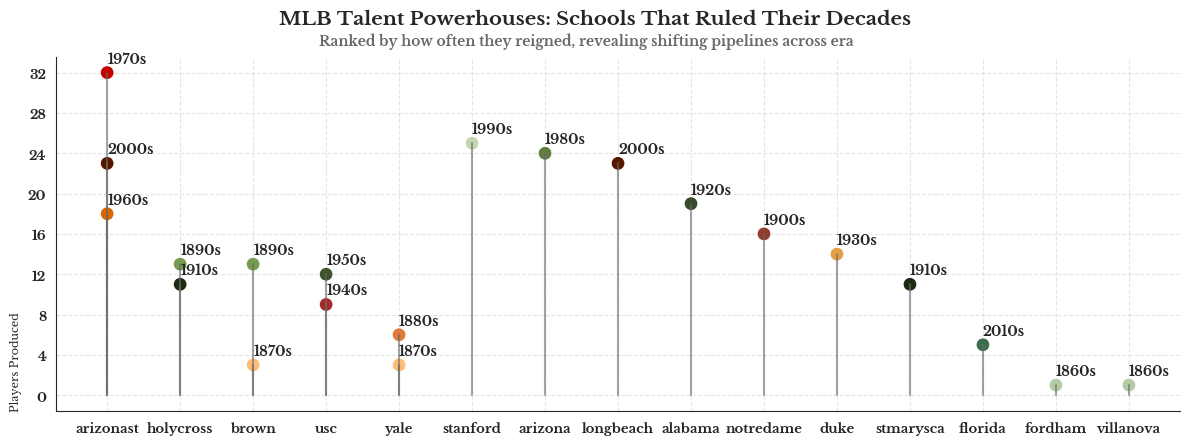

In [40]:
# Initialize plot
fig, ax = plt.subplots(figsize=(12, 4.5))
ax.grid(True, linestyle="--", alpha=0.5)

# Lollipop plot
sns.scatterplot(data=df_top_schools_per_decade, x="school_name", y="num_players", hue="decade",
                palette=palette_qualitative, ax=ax, legend=False, s=100)

for i, row in df_top_schools_per_decade.iterrows():
    x, y = row["school_name"], row["num_players"]
    ax.plot([x, x], [0, y], color=palette_core["secondary_gray"], alpha=0.6)
    ax.text(x, y + 1.0, row["decade"], fontsize=10, font=font_bold)

# Title & subtitle
fig.suptitle("MLB Talent Powerhouses: Schools That Ruled Their Decades", fontsize=14, font=font_bold)
fig.text(0.27, 0.90, 
         "Ranked by how often they reigned, revealing shifting pipelines across era", 
         fontsize=10, color="dimgrey", font=font_bold)

# Axes formatting
plt.xticks(font=font_bold, size=9.5)
plt.yticks(range(0, 36, 4), font=font_bold, size=9.5)
plt.xlabel("")
plt.ylabel("Players Produced", font=font_regular, fontsize=8, loc="bottom")

plt.tight_layout()
plt.show()

- **Arizona State University** emerged as a long-standing talent powerhouse, dominating across **three decades**: the 1960s, 1970s, and 2000s.

- **Brown University** and **University of Holy Cross** also had **multi-decade runs**, showing consistent player output.

- Northeastern schools like **Yale**, **Fordham**, and **Villanova** dominated early but gave way to **Southern and Western programs** in later years.

- In recent decades, the pipeline **shifted west and south**: California State Long Beach, University of Florida, and Arizona State now fuel much of MLB’s new talent—echoing a regional realignment in baseball development.

---
## 4. Salary Analysis
Financial investment has long played a central role in shaping team strategy, competitiveness, and long-term success in Major League Baseball. In this section, we dive into team-level salary data to uncover which franchises have consistently led in spending and how those patterns have shifted over time.

### 🔹 What We’ll Explore:
-  **4.1 Top 20% High-Spending Teams**  
   Meet the top 20% of financially committed franchises, as measured by average annual salary spending.
   
- **4.2 Cumulative Spending Over Time**  
   Trace the financial footprints of each team across seasons to reveal who’s been in it for the long haul.

- **4.3 Crossing the Billion-Dollar Mark**  
   Find out when teams hit the major milestone of \$1 billion in total player salaries and what that says about their financial trajectory.

By the end, you’ll have a clearer picture of where the money flows in MLB and what it might mean for performance, legacy, and competitive balance.

---
### 4.1 Top 20% High-Spending Teams
*Which MLB teams have consistently put their money where their ambition is?*

By spotlighting these perennial spenders, we begin to understand how money can shape long-term performance, recruitment power, and influence within the league.

**🔹 Method Summary:**

We computed the average annual spend per team and segmented teams into quintiles, returning only the top 20% of spenders.
```sql
-- Calculate total annual salary spending per team
CREATE TEMPORARY TABLE IF NOT EXISTS team_annual AS (
	SELECT teamid, yearid, SUM(salary) AS total_spend_yr
	FROM salaries
	GROUP BY teamid, yearid
	ORDER BY teamid, yearid
);

-- Segment teams into quintiles to compute average annual spending
WITH avg_spend_tiles AS (
	SELECT teamid,
		   AVG(total_spend_yr) AS avg_yearly_spend,
		   NTILE(5) OVER (ORDER BY ROUND(AVG(total_spend_yr)) DESC) AS spend_pct 
	FROM team_annual
	GROUP BY teamid
)

-- Extract the top quintile (top 20%)
SELECT teamid AS team, ROUND(avg_yearly_spend / 1000000, 1) AS avg_spend_in_mil
FROM avg_spend_tiles
WHERE spend_pct = 1;

**🔹 Query Result:**

In [45]:
# Load and preview result
df_top_spenders = load_sql_query("4.1_top_spenders")
preview_table(df_top_spenders, "df_top_spenders")

**Preview of `df_top_spenders`**

,team,avg_spend_in_mil
0,SFG,143.5
1,LAA,118.5
...,...,...
6,ARI,71.2
7,PHI,66.1


### 📊 Insights: Top 20% High Spenders:

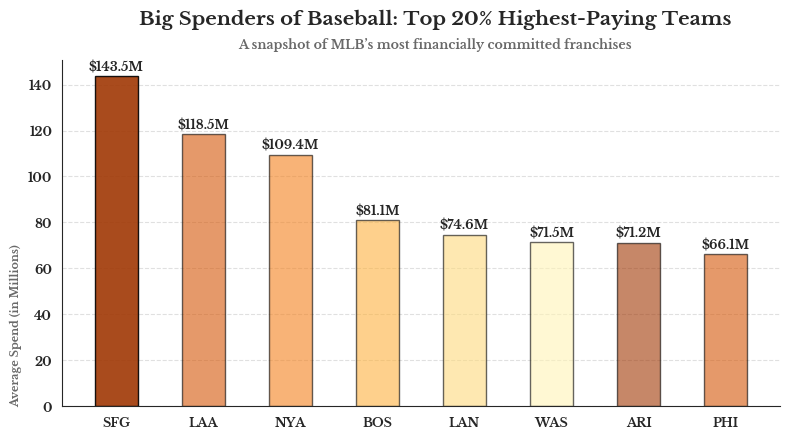

In [47]:
# Setup and plotting
fig, ax = plt.subplots(figsize=(8, 4))

custom_barplot(
    df=df_top_spenders, 
    x_axis="team", 
    y_axis="avg_spend_in_mil", 
    hue="team", 
    y_label="Average Spend (in Millions)", annote=False)

# Title and subtitle
fig.text(0.55, 1.05, "Big Spenders of Baseball: Top 20% Highest-Paying Teams", ha="center", font=font_bold, fontsize=14)
fig.text(0.55, 0.99, "A snapshot of MLB’s most financially committed franchises", ha="center", fontsize=9, color="dimgrey", font=font_bold)

# Value labels
for index, value in enumerate(df_top_spenders["avg_spend_in_mil"]):
    ax.text(x=index, y=value + 1, s=f"${value:.1f}M", 
            ha='center', va="bottom", 
            font=font_bold, fontsize=9)

plt.show()

- **San Francisco Giants (SFG)** top the list with an average yearly spend of **$143.5 million**, outpacing all other franchises.

- Close behind are the **Los Angeles Angels (LAA)** and the **New York Yankees (NYA)**—teams known for marquee contracts and star power.

- These top-tier spenders highlight how **financial capacity and willingness to invest** are crucial components of competitive strategy in modern baseball.

---
### 4.2 Cumulative Spending Over Time
*How have MLB teams’ salary investments stacked up over the decades?*

To track long-term financial strategies, we examine how each team’s total salary spending has accumulated over the years. This reveals which franchises have consistently invested and how spending trajectories have diverged across the league.

**🔹 Method Summary:**

We use the `team_annual` table to get each team’s total yearly spend and apply a running sum (cumulative window) by team across years.
```sql
-- Calculate teams' cumulative spending over the years (in millions)
SELECT teamid AS team, yearid AS year, 
	   ROUND(SUM(total_spend_yr) OVER 
	   (PARTITION BY teamid ORDER BY yearid) / 1000000, 1) AS cumulative_sum_in_mil
FROM team_annual
ORDER BY teamid, yearid;

**🔹 Query Result:**

In [51]:
# Load and preview result
df_team_cumulative_spend = load_sql_query("4.2_team_cumulative_spend")
preview_table(df_team_cumulative_spend, "df_team_cumulative_spend")

**Preview of `df_team_cumulative_spend`**

,team,year,cumulative_sum_in_mil
0,ANA,1997,31.1
1,ANA,1998,72.4
...,...,...,...
858,WAS,2013,583.4
859,WAS,2014,715.4


To keep the visual clean and focused, we spotlight the **top 5 teams** with the highest overall salary investment.

In [53]:
# Identify top 5 teams by total spend
team_salary_cum = salaries.pivot_table(values='salary', index='teamid', aggfunc='sum').sort_values(ascending=False, by='salary')
top_teams = team_salary_cum.head(5).index.values

# Filter to top 5 for visualization
filtered_df = df_team_cumulative_spend[df_team_cumulative_spend['team'].isin(top_teams)]

###  📊 Insights: Long-Term Financial Commitment

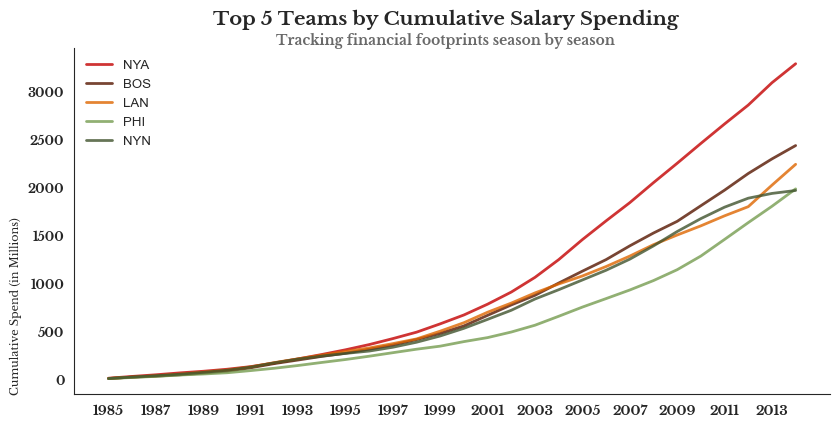

In [55]:
10# Setup and plotting (line plot)
fig, ax = plt.subplots(figsize=(8.5, 4))

sns.lineplot(data=filtered_df, x="year", y="cumulative_sum_in_mil", 
             hue="team", hue_order=top_teams, palette=palette_qualitative[:5], 
             linewidth=2.0, alpha=0.8)

# Title and subtitle
fig.text(0.53, 1.02, "Top 5 Teams by Cumulative Salary Spending", ha="center", font=font_bold, fontsize=14)
fig.text(0.53, 0.97, "Tracking financial footprints season by season", ha="center", fontsize=10, color='dimgrey', font=font_bold)

# Styling
plt.xticks(range(filtered_df['year'].min(), filtered_df['year'].max(), 2), font=font_bold, size=9.5)
plt.yticks(font=font_bold, size=9)
plt.xlabel("")
plt.ylabel('Cumulative Spend (in Millions)', font=font_regular, fontsize=8, loc="bottom")
plt.legend(loc="upper left", edgecolor="white", fontsize=9.5)

plt.tight_layout()
plt.show()

- **New York Yankees (NYA)** dominate the chart with a sharp spending surge starting in the 2000s, separating themselves from the pack.

- **Red Sox (BOS), Dodgers (LAN)**, and **Mets (NYN)** follow a similar high-spend trajectory, though with more variation in pace.

- **Phillies (PHI)** show a more measured climb, suggesting a steadier and less aggressive financial strategy.

This visualization offers a clear picture of how different franchises approach long-term roster investment, and how some have built spending legacies over time.

---
### 4.3 Crossing the Billion-Dollar Mark
*Which teams hit the \$1 billion payroll mark first, and what does that reveal about financial leadership in MLB?*

This analysis traces when each team first crossed the $1B cumulative salary threshold, offering insight into early big spenders and broader shifts in payroll strategy.

**🔹 Method Summary:**

We calculate each team’s cumulative salary spending over time and extract the first year they exceeded \$1 billion.
```sql
-- Identify first year each team crosses $1B in cumulative salary spend (in millions)
WITH team_cumulative AS (
	SELECT teamid, yearid, 
		ROUND(SUM(total_spend_yr) OVER 
		(PARTITION BY teamid ORDER BY yearid) / 1000000, 1) AS cumulative_sum_in_mil
	FROM team_annual
),
    
year_ranking AS (
	SELECT *, FIRST_VALUE(yearid) OVER (PARTITION BY teamid ORDER BY yearid) AS yr_1_bil
	FROM team_cumulative
	WHERE cumulative_sum_in_mil > 1000
)
    
SELECT teamid, yr_1_bil, ROUND(cumulative_sum_in_mil / 1000, 2) AS cumulative_sum_in_bil
FROM year_ranking
WHERE yearid = yr_1_bil;

**🔹 Query Result:**

In [59]:
# Load and preview result
df_one_billion_threshold = load_sql_query("4.3_one_billion_threshold")
preview_table(df_one_billion_threshold, "df_one_billion_threshold")

**Preview of `df_one_billion_threshold`**

,teamid,yr_1_bil,cumulative_sum_in_bil
0,ARI,2012,1.02
1,ATL,2005,1.07
...,...,...,...
24,TEX,2007,1.04
25,TOR,2008,1.05


We then:
- Count how many teams hit the milestone **each year**
- Highlight teams that reached it **by 2007**, showing early financial commitment

In [61]:
# Count teams per year
df_year_count = df_one_billion_threshold['yr_1_bil'].value_counts().sort_index()

# Identify early high-spenders
early_spenders = df_one_billion_threshold[df_one_billion_threshold['yr_1_bil'] <= 2007]
early_spenders_jittered = early_spenders.copy()

# Add jitter for overlapping labels
overlapping_teams = ['SEA', 'SFN', 'TEX']
offsets = [-0.003, 0, 0.003]
for team, offset in zip(overlapping_teams, offsets):
    early_spenders_jittered.loc[early_spenders_jittered['teamid'] == team, 'cumulative_sum_in_bil'] += offset

###  📊 Insights: Reaching the Billion-Dollar Milestone

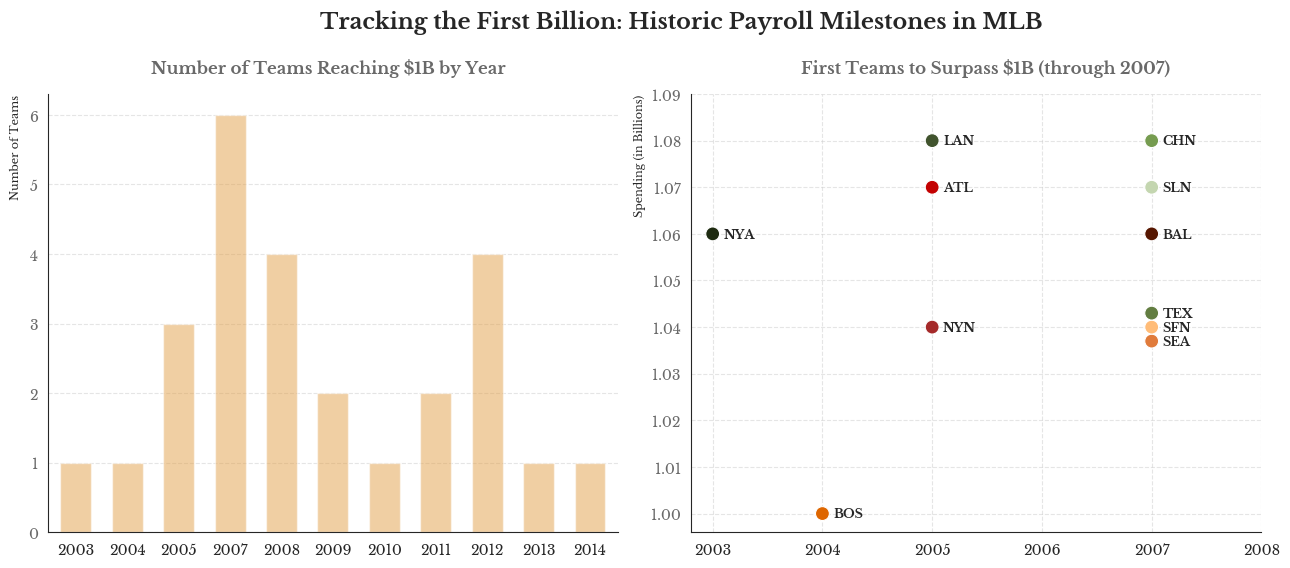

In [63]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

# -- Bar Plot (Annual count of $1B milestones) --
df_year_count.plot.bar(color=palette_core["primary_light"], width=0.6, alpha=0.5, ax=ax1)
ax1.grid(axis="y", linestyle="--", alpha=0.5)

# -- Scatter Plot (Early big spenders) --
sns.scatterplot(data=early_spenders_jittered, x="yr_1_bil", y="cumulative_sum_in_bil", 
                hue="teamid", palette=palette_qualitative[:11], s=100, legend=False, ax=ax2)
ax2.grid(True, linestyle='--', alpha=0.5)

# Add labels to each scatter point
for i in range(early_spenders_jittered.shape[0]):
    ax2.text(early_spenders_jittered["yr_1_bil"].iloc[i] + 0.1, 
             early_spenders_jittered["cumulative_sum_in_bil"].iloc[i], 
             early_spenders_jittered["teamid"].iloc[i], fontsize=9, font=font_bold, ha="left", va="center")

# Axis and labels
y_labels = {1: "Number of Teams", 2: "Spending (in Billions)"}
y_range = range(0, 7, 1)

for i, ax in zip([1, 2], (ax1, ax2)):
    if i == 2: 
        y_range = np.arange(1.00, 1.09, 0.01)
        ax.set_xticks(range(2003, 2009, 1))
    ax.set_xlabel("")
    ax.set_ylabel(y_labels[i], font=font_regular, fontsize=8, loc="top")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, font=font_regular, fontsize=10)
    ax.set_yticks(y_range)
    ax.set_yticklabels(ax.get_yticklabels(), font=font_regular, fontsize=10, color="dimgrey")

# Title and subtitles
fig.text(0.25, 1.09, "Tracking the First Billion: Historic Payroll Milestones in MLB", fontsize=16, font=font_bold)
fig.text(0.12, 1.0, "Number of Teams Reaching $1B by Year", fontsize=12, color="dimgrey", font=font_bold)
fig.text(0.62, 1.0, "First Teams to Surpass $1B (through 2007)", fontsize=12, color="dimgrey", font=font_bold)

plt.tight_layout()
plt.show()

- **2007** marked a spending surge: **6 teams** hit the $1B mark—the highest in any year.

- Following closely, **2008** and **2012** each saw 4 teams join the billion-dollar club, while **2005** saw 3 teams cross the milestone.

- **New York Yankees (NYA)** led the way in **2003**, reaching **\$1.06B**, followed by the **Boston Red Sox (BOS)** in 2004.

- The early entrants reflect franchises that invested heavily early on, highlighting the financial dominance of these powerhouses. 

---
## 5. Career Analysis
*How long do MLB players really stick around and how loyal are they to their teams?*

In this section, we dive into the career trajectories of Major League Baseball players. We’ll examine how long players stay active, when they typically debut and retire, and how often they stick with a single franchise throughout their careers.

### 🔹 What We'll Explore:
We aim to answer the following:

-  **5.1 Career Span Analysis**  
   How long did players’ careers last? At what age did they start and finish playing?

-  **5.2 Player Retention Across Teams**  
   Which players stayed with one team for over a decade? Which teams had the strongest track record for retaining players?

---
### 5.1 Career Span Analysis
*How long do MLB careers really last and when do players typically enter and exit the league?*

Baseball careers can be short-lived or legendary. In this section, we explore career longevity across thousands of MLB players and track how early they started, how long they stayed, and when they retired.

**🔹 Method Summary:**

We calculated each player’s career length, debut age, and retirement age.
```sql
CREATE TEMPORARY TABLE IF NOT EXISTS career_info AS (
    SELECT playerid, birthyear, birthmonth, birthday, namegiven, debut, finalgame, 
           EXTRACT(YEAR FROM debut) AS debut_year,
           EXTRACT(YEAR FROM finalgame) AS final_year
    FROM players
);

-- Calculate career length, debut age, and retirement age
SELECT playerid, namegiven, 
       final_year - debut_year AS career_length,
       debut_year - birthyear AS start_age,
       final_year - birthyear AS end_age
FROM career_info
WHERE final_year - debut_year IS NOT NULL AND debut_year - birthyear > 0
ORDER BY career_length DESC;

**🔹 Query Result:**

In [68]:
# Load query and preview results
df_career_span = load_sql_query("5.1_career_span")
preview_table(df_career_span, "df_career_span")

**Preview of `df_career_span`**

,playerid,namegiven,career_length,start_age,end_age
0,altroni01,Nicholas,35.0,22.0,57.0
1,orourji01,James Henry,32.0,22.0,54.0
...,...,...,...,...,...
18256,zinsebi01,William Francis,0.0,26.0,26.0
18257,zoccope01,Peter Jude,0.0,26.0,26.0


### 📊 Insights: Histogram Trio of Career Metrics

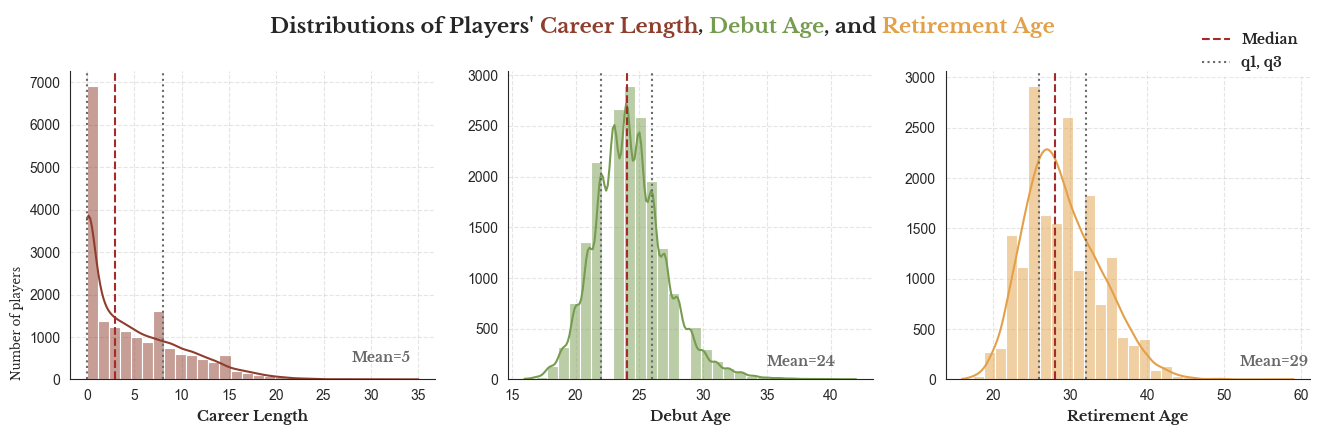

In [70]:
# Figure layout for histograms
fig, axes = plt.subplots(1, 3, figsize=(16, 4)) 

# Define colors for each plot
color_map = [palette_qualitative[12], palette_qualitative[3], palette_qualitative[13]]
col_map = {0: "career_length", 1: "start_age", 2: "end_age"}
xlabel_map = {0: "Career Length", 1: "Debut Age", 2: "Retirement Age"}

# Plot histograms
for i, ax in zip(range(3), axes):   
    col = df_career_span[col_map[i]]
    ylabel = "Number of players" if i == 0 else ""

    sns.histplot(col, bins=30, kde=True, color=color_map[i], ax=ax)
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_xlabel(xlabel_map[i], font=font_bold, fontsize=10.5)
    ax.set_ylabel(ylabel, font=font_regular, fontsize=8.5, loc="bottom")

    # Add vertical lines for Q1, Median, and Q3
    ax.axvline(col.median(), color=palette_core["avline"], linestyle="--", label="Median")
    ax.axvline(col.quantile(0.25), color=palette_core["secondary_gray"], linestyle=":")
    ax.axvline(col.quantile(0.75), color=palette_core["secondary_gray"], linestyle=":", label="q1, q3")

    # Annotate with mean
    pad = 450 if i == 0 else 0
    ax.text(x=col.max()-7, y=250 + pad, va="top", ha="left", font=font_bold,
            color=palette_core["secondary_gray"], s=f"Mean={round(col.mean(), 0).astype('int')}")

# Show legend for the last plot
axes[2].legend(bbox_to_anchor=(1.0, 1.17), edgecolor="white", prop=font_bold)

# Add title with highlighted terms
fig_text(
    x=0.25, y=1.02, s="Distributions of Players' <Career Length>, <Debut Age>, and <Retirement Age>",
    fontsize=15, fontproperties=font_bold,
    highlight_textprops=[{"color": color_map[0]}, {"color": color_map[1]}, {"color": color_map[2]},]
)

plt.show()

The data shows that the typical player’s time in the league is fleeting, marked by a narrow age window and steep drop-off after only a few seasons.
<div style="display: flex; justify-content: space-between; gap: 60px; margin-top: 20px;">

  <div style="width: 50%; padding: 2px;">
    <h5>Career Length <i>(Right-Skewed)</i></h5>
    <p><em>While a few names stick around for decades, the MLB career </br>path is often short and sharp.</em></p>
    <ul>
      <li>Average career: <strong>~3 years</strong></li>
      <li><strong>75%</strong> play <strong>8 years or less</strong></li>
      <li>Nearly <strong>7,000 players</strong> lasted just <strong>1 season or less</strong></li>
    </ul>
  </div>

  <div style="width: 50%; padding: 2px;">
    <h5>Debut and Retirement Age <i>(Bell-Curved)</i></h5>
    <p><i>Most players debut around age 24 and retire near age 29, </br>following a relatively narrow age window.</i></p>
    <ul>
      <li>A few start as <strong>early as 16. </strong>Others enter in their 30s, though rare</li>
      <li><strong>Half of all players</strong> conclude their careers before <strong>age 28</strong></li>
      <li>Some outliers retire in their 40s, but they’re exceptions</li>
    </ul>
  </div>

</div>

---
### 5.2 Player Retention Across Teams

*Do players stay loyal to the teams they start with?*
This section explores player mobility by comparing each player's debut and final team, and investigates how well teams retain long-term players.


**🔹 Method Summary:**

We identified each player’s debut and final team, then flag those who played more than 5 seasons. We calculated retention rates by team, highlighting top vs. bottom performers.
```sql
-- Extract debut/final year and team for each player
WITH career_info AS (
  SELECT playerid, debut, finalgame,
         EXTRACT(YEAR FROM debut) AS debut_year,
         EXTRACT(YEAR FROM finalgame) AS final_year
  FROM players
)
    
SELECT *,
       FIRST_VALUE(teamid) OVER (PARTITION BY playerid ORDER BY yearid) AS debut_team,
       FIRST_VALUE(teamid) OVER (PARTITION BY playerid ORDER BY yearid DESC) AS final_team,
       ROW_NUMBER() OVER (PARTITION BY playerid ORDER BY yearid) AS row_num
FROM (
    SELECT ci.playerid, ci.debut_year, ci.final_year, s.yearid, s.teamid
    FROM career_info AS ci
    LEFT JOIN salaries AS s ON ci.playerid = s.playerid
    WHERE s.teamid IS NOT NULL
) AS player_team_history
ORDER BY playerid, yearid;


**🔹 Query Result:**

In [74]:
# Load query and preview result
df_team_history = load_sql_query("5.2_team_history")
preview_table(df_team_history, "df_team_history")

**Preview of `df_team_history`**

,playerid,namegiven,debut_year,final_year,yearid,teamid,debut_team,final_team,row_num
0,aardsda01,David Allan,2004.0,2013.0,2004,SFN,SFN,NYA,1
1,aardsda01,David Allan,2004.0,2013.0,2007,CHA,SFN,NYA,2
...,...,...,...,...,...,...,...,...,...
24751,zupcibo01,Robert,1991.0,1994.0,1993,BOS,BOS,BOS,3
24752,zuvelpa01,Paul,1982.0,1991.0,1989,ATL,ATL,ATL,1


Only long-term players (career > 5 years) are included to focus on meaningful retention patterns.

In [76]:
df_long_term = df_team_history[
    (df_team_history["final_year"] - df_team_history["debut_year"] > 5) & 
    (df_team_history["row_num"] == 1)
].copy()

df_long_term["is_loyal_player"] = np.where(
    df_long_term["debut_team"] == df_long_term["final_team"], "loyal", "not_loyal"
)

We calculate the retention rate per team:

In [78]:
team_loyalty_counts = (
    df_long_term.groupby(["debut_team", "is_loyal_player"])["playerid"]
    .nunique()
    .unstack(fill_value=0)
    .rename_axis("team")
    .reset_index()
)

team_loyalty_counts["retention_rate"] = round(
    team_loyalty_counts["loyal"] / 
    (team_loyalty_counts["loyal"] + team_loyalty_counts["not_loyal"]), 2
)

df_team_retention = team_loyalty_counts.sort_values("retention_rate", ascending=False)

# Top & Bottom teams
combined = pd.concat([
    df_team_retention.nlargest(5, "retention_rate").assign(Group="Top"),
    df_team_retention.nsmallest(5, "retention_rate").assign(Group="Bottom")
])

### 📊 Insights: Team Loyalty Exception or the Rule?

*How common is it for teams to retain long-term players?*

The data reveals that less than 1 in 4 long-term players stay with their first team.

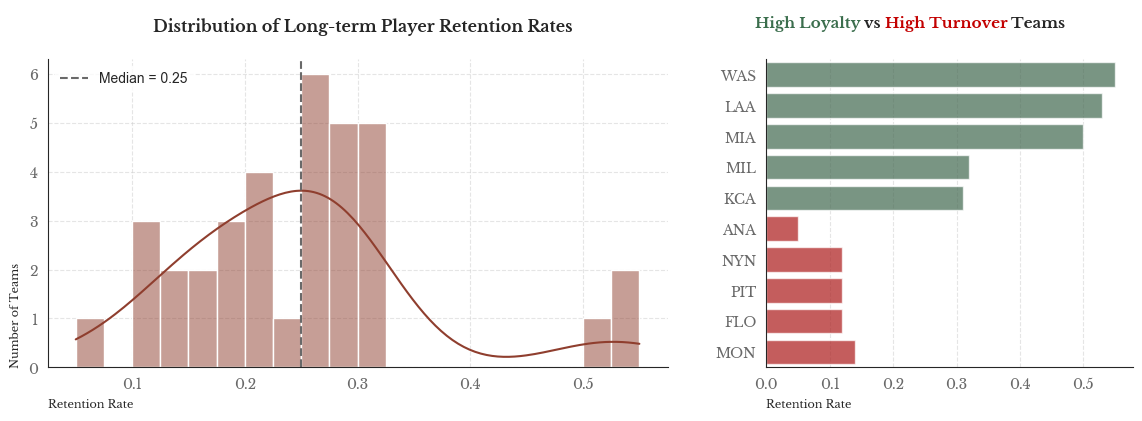

In [80]:
# Figure layout
fig = plt.figure(figsize=(14, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[2.2, 1.3], wspace=0.20)

# --- Plot 1: Histogram ---
ax0 = plt.subplot(gs[0])
sns.histplot(df_team_retention, x="retention_rate", bins=20, kde=True, color=palette_core["primary_dark"], ax=ax0)
ax0.grid(True, linestyle="--", alpha=0.5)
ax0.axvline(df_team_retention["retention_rate"].median(), label=f"Median = {df_team_retention["retention_rate"].median()}", 
            color=palette_core["secondary_gray"], linestyle="--", )

# Axis and labels
fig.text(0.20, 0.95, "Distribution of Long-term Player Retention Rates", font=font_bold, fontsize=11.5)
ax0.legend(edgecolor="white", loc="upper left")
ax0.set_ylabel("Number of Teams", fontsize=8, fontproperties=font_regular, loc="bottom")
ax0.set_yticks(range(0, 7))

# --- Plot 2: Bar Plots ---
ax1 = plt.subplot(gs[1])
palette = {"Top": palette_core["highlight_green"], "Bottom": palette_core["highlight_red"]}
sns.barplot(data=combined, y="team", x="retention_rate", hue="Group", dodge=False, palette=palette, ax=ax1, alpha=0.7, legend=False)
ax1.grid(axis="x", linestyle="--", alpha=0.5)
ax1.set_ylabel("")

# Title
fig_text(
    x=0.63, y=0.99, s="<High Loyalty> vs <High Turnover> Teams", 
    fontsize=11, fontproperties=font_bold,
    highlight_textprops=[{"color": palette["Top"]}, {"color": palette["Bottom"]}]
)


# Shared formatting for both axes
for ax in (ax0, ax1):
    ax.set_xlabel("Retention Rate", fontsize=8, fontproperties=font_regular, loc="left")
    ax.tick_params(axis="both", labelsize=10)
    
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontproperties(font_regular)
        label.set_color("dimgrey")

plt.show()

Out of **2,669** long-term players, just **611** (23%) stayed with their debut team. Most teams retain only a quarter of their players.
- **Top 3 Retaining Teams:** WAS (**55%**), LAA (**53%**), MIA (**50%**)

- **Lowest Retention:** ANA at just **5%**

These figures highlight stark differences in how well teams retain long-term players. It can reflect more than contracts — it may indicate team culture, development investment, or player satisfaction.

---
## 6. Players Comparison Analysis

*How do MLB players differ in batting style, throwing hand, height, and weight, and have those traits changed over time?*

In this final section, we explore the personal attributes that shape how players play the game. From batting and throwing preferences to physical build, we’ll uncover trends and contrasts across teams and eras.

### 🔹 What We'll Explore:
We aim to answer the following questions:

-  **6.1 Batting and Throwing Preferences**  
   How do teams differ in player handedness and are some preferences more common?

-  **6.2 Height and Weight Trends**  
   How has the average height and weight evolved across debut years and decades?

---
### 6.1 Batting and Throwing Preferences
*Are most players right-handed, or do some teams break the mold?*

This section explores how batting and throwing preferences vary across teams and what patterns emerge.

**🔹 Method Summary:**

We calculated the percentage of players on each team who bat right, left, or both (switch hitters) and throw left or right.
```sql
-- SQL query truncated for brevity
WITH sum_stats AS (
    SELECT 
        s.teamid,
        -- Count of players who bat both, left, or right-handed
        COUNT(DISTINCT CASE WHEN p.bats = 'B' THEN p.playerid ELSE NULL END) AS bat_both,
        COUNT(DISTINCT CASE WHEN p.bats = 'L' THEN p.playerid ELSE NULL END) AS bat_left,
        COUNT(DISTINCT CASE WHEN p.bats = 'R' THEN p.playerid ELSE NULL END) AS bat_right,
        
        -- Count of players who throw left or right-handed
        COUNT(DISTINCT CASE WHEN p.throws = 'L' THEN p.playerid ELSE NULL END) AS throw_left,
        COUNT(DISTINCT CASE WHEN p.throws = 'R' THEN p.playerid ELSE NULL END) AS throw_right,
        
        COUNT(DISTINCT p.playerid) * 1.0 AS total
    FROM players AS p
    GROUP BY s.teamid
)

-- Calculate batting and throwing percentages per team
SELECT COALESCE(teamid, 'N/A') AS team,
        ROUND(bat_both/total * 100, 2) AS bat_both_pct,
        ROUND(bat_left/total * 100, 2) AS bat_left_pct,
        ROUND(bat_right/total * 100, 2) AS bat_right_pct,
        ROUND(throw_left/total * 100, 2) AS throw_left_pct,
        ROUND(throw_right/total * 100, 2) throw_right_pct
FROM sum_stats;

**🔹 Query Result:**

In [85]:
# Load and preview result
df_bat_throw_preference = load_sql_query("6.1_bat_throw_preference")
preview_table(df_bat_throw_preference, "df_bat_throw_preference")

# Generate descriptive Stats
df_preference_stats = df_bat_throw_preference.describe().loc[['mean', 'max','50%', '75%']]
preview_table(df_preference_stats, "df_preference_stats")

**Preview of `df_bat_throw_preference`**

,team,bat_both_pct,bat_left_pct,bat_right_pct,throw_left_pct,throw_right_pct
0,ANA,9.09,24.55,66.36,17.27,82.73
1,ARI,9.01,29.61,61.37,21.89,78.11
...,...,...,...,...,...,...
35,TOR,9.25,25.37,65.37,18.81,81.19
36,WAS,10.43,28.22,61.35,21.47,78.53


**Preview of `df_preference_stats`**

,bat_both_pct,bat_left_pct,bat_right_pct,throw_left_pct,throw_right_pct
mean,9.494865,27.857027,62.647297,21.16027,78.84
max,18.52,32.13,68.6,25.0,87.5
...,...,...,...,...,...
50%,9.35,28.22,63.02,21.27,78.73
75%,10.5,29.17,63.73,23.06,79.94


### 📊 Insights: Batting and Throwing Preferences Across Teams

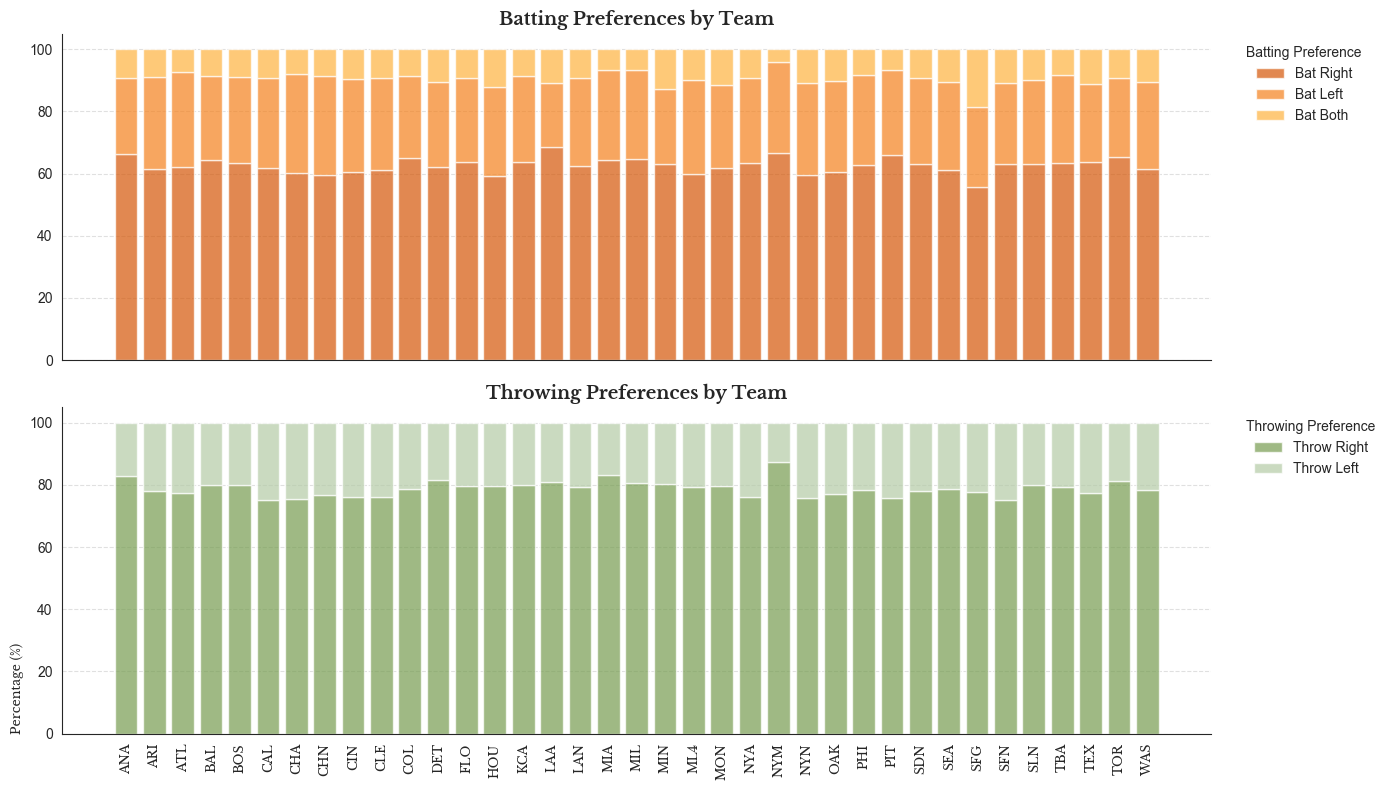

In [87]:
# Separate into two batting anf throwing data frames
batting_df = df_bat_throw_preference.set_index('team')[['bat_right_pct', 'bat_left_pct', 'bat_both_pct']].sort_index()
throwing_df = df_bat_throw_preference.set_index('team')[['throw_right_pct', 'throw_left_pct']].sort_index()

def plot_stacked_bar(ax, df, colors, item, title, legend_title):
    """Helper function for stacked bar plots."""
    bottom = pd.Series([0] * len(df), index=df.index)
    for i, col in zip(range(0, item, 1), df.columns.values):
        ax.bar(df.index, df[col], bottom=bottom, label=col.replace("_pct", "").replace("_", " ").title(), color=colors[i], alpha=0.7)
        bottom += df[col]

    # Title and legnds
    ax.set_title(title, font=font_bold, fontsize=13)
    ax.legend(title=legend_title, bbox_to_anchor=(1.02, 1), loc="upper left", edgecolor="white")
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    # Set ticks
    ticks = list(throwing_df.index)
    ax.set_xticks(range(len(ticks)))
    ax.set_xticklabels(ticks, rotation=90, font=font_regular, fontsize=9)

# Layout and plotting
fig, axes = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

plot_stacked_bar(axes[0], batting_df, palette_sequential[1:], 3, "Batting Preferences by Team", "Batting Preference")
plot_stacked_bar(axes[1], throwing_df, [palette_qualitative[3], palette_qualitative[15]], 2, 
                 "Throwing Preferences by Team", "Throwing Preference")
axes[1].set_ylabel("Percentage (%)", font=font_regular, fontsize=9, loc="bottom")

plt.tight_layout()
plt.show()

- <h5>Batting styles show some variety:</h5>

  Teams average **63% right-handed**, **28% left-handed**, and **9% switch hitters**, with some teams favoring lefties more than others.

- <h5>Throwing styles are consistent:</h5>

  A dominant **79%** of players **throw right-handed**. Most teams rely heavily on right-handed throwers — **80% of teams have over 75% righty throwers**.

---
### 5.3 Height and Weight Trends Over Decades
*How have player physiques evolved over time?*

Let’s examine how average MLB player height and weight have changed over the past 140+ years.

**🔹 Method Summary:**

We calculate the average height (in inches) and weight (in pounds) of players by decade based on their debut year. We also measure the change between each decade.
```sql
WITH avg_hw AS (
	SELECT FLOOR(EXTRACT(YEAR FROM debut) / 10) * 10 AS decade, 
			ROUND(AVG(height)) AS avg_height_inches, ROUND(AVG(weight)) AS avg_weight_lbs
	FROM players
	GROUP BY FLOOR(EXTRACT(YEAR FROM debut) / 10) * 10)

SELECT  decade::INT, avg_height_inches,
		avg_height_inches - LAG(avg_height_inches) OVER (ORDER BY decade) AS height_diff,
		avg_weight_lbs,
		avg_weight_lbs - LAG(avg_weight_lbs) OVER (ORDER BY decade) AS weight_diff
FROM avg_hw
WHERE decade IS NOT NULL
ORDER BY decade;

**🔹 Query Result:**

In [91]:
# Load and preview results
df_height_weight_stats = load_sql_query("6.2_height_weight_stats")
preview_table(df_height_weight_stats, "df_height_weight_stats")

# Descriptive stats
df_summary_stats = df_height_weight_stats[['height_diff', 'weight_diff']].describe()
df_summary_stats.loc[['mean', '25%', '50%', '75%', 'min', 'max']]

**Preview of `df_height_weight_stats`**

,decade,avg_height_inches,height_diff,avg_weight_lbs,weight_diff
0,1870,69.0,NaN,163.0,NaN
1,1880,70.0,1.0,169.0,6.0
...,...,...,...,...,...
13,2000,74.0,1.0,206.0,12.0
14,2010,74.0,0.0,207.0,1.0


,height_diff,weight_diff
mean,0.357143,3.142857
25%,0.000000,1.000000
50%,0.000000,2.000000
75%,1.000000,5.500000
min,0.000000,-2.000000
max,1.000000,12.000000


### 📊 Insights: Trends in Players' Height and Weight

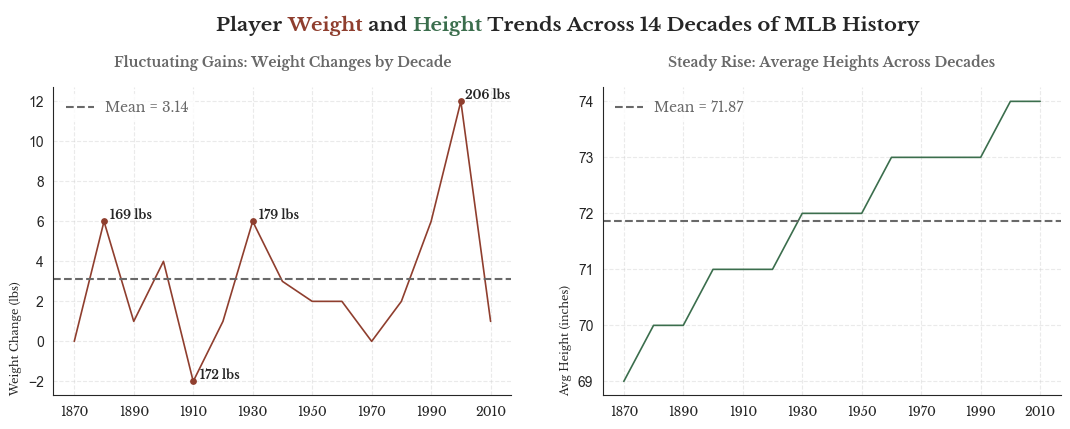

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))
color_map = [palette_core["primary_dark"], palette_core["highlight_green"]]

# Map details for height and weight plots
col_map = {0: "weight_diff", 1: "avg_height_inches"}
ylabel_map = {0: "Weight Change (lbs)", 1: "Avg Height (inches)"}
title_map = {0: "Fluctuating Gains: Weight Changes by Decade", 1: "Steady Rise: Average Heights Across Decades"}
highlight_decades = [1870, 1880, 1910, 1930, 2000]

# Plot height and weight trends side by side
for i, ax in zip(range(2), axes):
    col = col_map[i]
    color = color_map[i]
    mean_val = round(df_height_weight_stats[col].mean(), 2)
    
    sns.lineplot(data=df_height_weight_stats.fillna(0), x="decade", y=col, ax=ax, color=color, linewidth=1.2)
    ax.axhline(mean_val, color=palette_core["secondary_gray"], linestyle="--", label=f"Mean = {mean_val}")

    # Value labels
    if col == "weight_diff":
        for _, row in df_height_weight_stats[df_height_weight_stats["decade"].isin(highlight_decades)].iterrows():
            ax.text(row["decade"] + 9, row[col], f"{int(row['avg_weight_lbs'])} lbs",
                    ha="center", va="bottom", fontproperties=font_bold, fontsize=8.5)
            ax.scatter(row["decade"], row[col], s=15, color=color)
    
    ax.set_xticks(range(1870, 2020, 20))
    ax.set_xticklabels(range(1870, 2020, 20), fontproperties=font_regular, fontsize=9)
    ax.set_xlabel("")
    ax.set_ylabel(ylabel_map[i], fontproperties=font_regular, fontsize=8, loc="bottom")
    ax.set_title(title_map[i], fontsize=11, font=font_bold, color="dimgray", pad=15)
    ax.grid(True, linestyle="--", alpha=0.4)
    ax.legend(loc="upper left", fontsize=7, prop=font_regular, labelcolor="dimgray", edgecolor="white")

# Title
fig_text(
    x=0.25, y=1.06, s="Player <Weight> and <Height> Trends Across 14 Decades of MLB History",
    fontsize=14, fontproperties=font_bold,
    highlight_textprops=[{"color": color_map[0]}, {"color": color_map[1]}]
)

plt.show()

- <h5>Height has changed slowly and predictably.</h5>
  
  Most decades saw a **0–1 inch increase**, with the average change just **0.35 inches**. This suggests that player height have increased but gradually and steadily.

- <h5>Weight has seen sharper shifts.</h5>

  The average gain per decade is **3.1 lbs**, but with notable spikes. For example, the 2000s saw a **12 lb jump**, reaching **~207** lbs in the 2010s — up from just **163 lbs in the 1870s**. These shifts reflect changes in training, nutrition, and game strategy.

## 🏁 Final Thoughts: A Century of Change in MLB Players

Over more than 150 years, Major League Baseball has transformed—shaped by shifting regions, rising athletic standards, and changing team strategies. Our deep dive into player data reveals four key dimensions of this evolution:

### 🔹 Where Talent Comes From 
*The MLB talent pipeline started small but exploded mid-century, peaking in school diversity by the 1990s. Today, fewer colleges dominate recruitment.*  
- **California leads all states**, producing 1,247 MLB players—double that of Texas or Florida.  
- **UT Austin, USC, and Arizona State** have fueled generations of stars.  
- A regional shift shows **Southern and Western schools** now dominate, replacing early powerhouses like Yale and Fordham.

---

### 🔹 How Teams Evolve
*Behind the scenes, money shapes the game.*
- **Giants, Yankees, and Angels** lead in total spend, showing how some franchises invest to stay competitive.  
- **Spending surges** in the 2000s redefined team building—six teams crossed $1B in a single year (2007).  
- **Player retention varies wildly**: While some teams keep half their players long-term, others keep just 5%, hinting at deeper cultural and strategic differences.

---

### 🔹 What the Typical MLB Career Looks Like 
*The average MLB player today has a short career and a narrow age window.*  
- Most debut around **24** and retire before **30**.  
- Only **25%** of long-term players stay with their first team.  
- **Career longevity is rare**—7,000+ players played just one season or less.

---

### 🔹 How Players Have Physically Changed 
*Baseball bodies have evolved slowly—but purposefully.* 
- **Height** increased less than an inch every 30 years.  
- **Weight** surged: from **163 lbs in the 1870s** to **207 lbs in the 2010s**, driven by training and performance needs.  
- **Batting and throwing styles** remain stable—most players bat right and throw right, though team preferences vary slightly.

---

### 🔹 The Bigger Picture  
Beneath the stats lies a dynamic story of how **geography, economics, and strategy** have shaped the modern MLB.  
It’s a game where fewer schools fuel more careers, where teams invest billions chasing an edge, and where most players burn bright—but briefly.  

This project offers a lens not just into who plays the game, but how the game itself has grown and shifted through generations.

---